# Capstone Project : Opening a new Indian Cusine Restaurant in Ney York City.

In [2]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library

In [3]:
with open('Data/newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [5]:
neighborhoods_data = newyork_data['features']

In [6]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [7]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [8]:
neighborhoods

Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []

In [9]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [10]:
neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [11]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [12]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [13]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [14]:
neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [1]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


In [16]:
LIMIT=100
radius=500

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    print(venues_list)
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
nyc_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

[[('Wakefield', 40.89470517661, -73.84720052054902, 'Lollipops Gelato', 40.894123150205274, -73.84589162362325, 'Dessert Shop'), ('Wakefield', 40.89470517661, -73.84720052054902, 'Carvel Ice Cream', 40.890486685759605, -73.84856772568665, 'Ice Cream Shop'), ('Wakefield', 40.89470517661, -73.84720052054902, 'Walgreens', 40.896528, -73.8447, 'Pharmacy'), ('Wakefield', 40.89470517661, -73.84720052054902, 'Rite Aid', 40.896649, -73.8448461, 'Pharmacy'), ('Wakefield', 40.89470517661, -73.84720052054902, 'Shell', 40.894187118166535, -73.84586195733382, 'Gas Station'), ('Wakefield', 40.89470517661, -73.84720052054902, "Dunkin'", 40.8904587811365, -73.84908886747644, 'Donut Shop'), ('Wakefield', 40.89470517661, -73.84720052054902, 'Subway', 40.89046821651127, -73.8491520209833, 'Sandwich Place'), ('Wakefield', 40.89470517661, -73.84720052054902, 'Central Deli', 40.896728, -73.844387, 'Deli / Bodega'), ('Wakefield', 40.89470517661, -73.84720052054902, 'Koss Quick Wash', 40.891281, -73.849904000

In [19]:
print(nyc_venues.shape)
nyc_venues.head()

(10088, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

              Venue  Venue Latitude  Venue Longitude  Venue Category  
0  Lollipops Gelato       40.894123       -73.845892    Dessert Shop  
1  Carvel Ice Cream       40.890487       -73.848568  Ice Cream Shop  
2         Walgreens       40.896528       -73.844700        Pharmacy  
3          Rite Aid       40.896649       -73.844846        Pharmacy  
4             Shell       40.894187       -73.845862     Gas Station

In [20]:
nyc_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                               
Allerton                                      28                      28   
Annadale                                      10                      10   
Arden Heights                                  4                       4   
Arlington                                      4                       4   
Arrochar                                      21                      21   
Arverne                                       20                      20   
Astoria                                      100                     100   
Astoria Heights                               14                      14   
Auburndale                                    18                      18   
Bath Beach                                    41                      41   
Battery Park City                             71                      71   
Bay Ridge                                     81                      81   
Bay Terrace                                   48                      48   
Baychester                                    20                      20   
Bayside                                       76                      76   
Bayswater                                      1                       1   
Bedford Park                                  34                      34   
Bedford Stuyvesant                            27                      27   
Beechhurst                                    17                      17   
Bellaire                                      14                      14   
Belle Harbor                                  18                      18   
Bellerose                                     21                      21   
Belmont                                      100                     100   
Bensonhurst                                   29                      29   
Bergen Beach                                   6                       6   
Blissville                                    20                      20   
Bloomfield                                     4                       4   
Boerum Hill                                   86                      86   
Borough Park                                  20                      20   
Breezy Point                                   6                       6   
Briarwood                                     10                      10   
Brighton Beach                                44                      44   
Broad Channel                                  5                       5   
Broadway Junction                             16                      16   
Bronxdale                                     12                      12   
Brooklyn Heights                             100                     100   
Brookville                                     1                       1   
Brownsville                                   18                      18   
Bulls Head                                    45                      45   
Bushwick                                      72                      72   
Butler Manor                                   6                       6   
Cambria Heights                               11                      11   
Canarsie                                       7                       7   
Carnegie Hill                                 92                      92   
Carroll Gardens                              100                     100   
Castle Hill                                    5                       5   
Castleton Corners                             16                      16   
Central Harlem                                43                      43   
Charleston                                    30                      30   
Chelsea                                      107                     107   
Chinatown                                    100                     100   

In [21]:
print('There are {} uniques categories.'.format(len(nyc_venues['Venue Category'].unique())))

There are 429 uniques categories.


In [22]:
# one hot encoding
nyc_onehot = pd.get_dummies(nyc_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nyc_onehot['Neighborhood'] = nyc_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [nyc_onehot.columns[-1]] + list(nyc_onehot.columns[:-1])
nyc_onehot = nyc_onehot[fixed_columns]

nyc_onehot.head()

Yoga Studio  Accessories Store  Adult Boutique  Afghan Restaurant  \
0            0                  0               0                  0   
1            0                  0               0                  0   
2            0                  0               0                  0   
3            0                  0               0                  0   
4            0                  0               0                  0   

   African Restaurant  American Restaurant  Antique Shop  Arcade  \
0                   0                    0             0       0   
1                   0                    0             0       0   
2                   0                    0             0       0   
3                   0                    0             0       0   
4                   0                    0             0       0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0                 0                       0            0           0   
1                 0                       0            0           0   
2                 0                       0            0           0   
3                 0                       0            0           0   
4                 0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Auditorium  Australian Restaurant  Austrian Restaurant  \
0                   0           0                      0                    0   
1                   0           0                      0                    0   
2                   0           0                      0                    0   
3                   0           0                      0                    0   
4                   0           0                      0                    0   

   Auto Garage  Auto Workshop  Automotive Shop  BBQ Joint  Baby Store  \
0            0              0                0          0           0   
1            0              0                0          0           0   
2            0              0                0          0           0   
3            0              0                0          0           0   
4            0              0                0          0           0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0           0       0     0    0               0                 0   
1           0       0     0    0               0                 0   
2           0       0     0    0               0                 0   
3           0       0     0    0               0                 0   
4           0       0     0    0               0                 0   

   Basketball Court  Bath House  Beach  Beach Bar  Bed & Breakfast  Beer Bar  \
0                 0           0      0          0                0         0   
1                 0           0      0          0                0         0   
2                 0           0      0          0                0         0   
3                 0           0      0          0                0         0   
4                 0           0      0          0                0         0   

   Beer Garden  Beer Store  Big Box Store  Bike Rental / Bike Share  \
0            0           0              0                         0   
1            0           0              0                         0   
2            0           0              0                         0   
3            0           0              0                         0   
4            0           0              0                         0   

   Bike Shop  Bike Trail  Bistro  Board Shop  Boat or Ferry  Bookstore  \
0 

In [23]:
nyc_onehot[['Indian Restaurant','South Indian Restaurant', 'North Indian Restaurant']].sum()

Indian Restaurant          62
South Indian Restaurant     1
North Indian Restaurant     2
dtype: int64

In [24]:
nyc_onehot.shape

(10088, 429)

In [25]:
nyc_grouped = nyc_onehot.groupby('Neighborhood').sum().reset_index()
nyc_grouped

Neighborhood  Yoga Studio  Accessories Store  \
0                     Allerton            0                  0   
1                     Annadale            0                  0   
2                Arden Heights            0                  0   
3                    Arlington            0                  0   
4                     Arrochar            0                  0   
5                      Arverne            0                  0   
6                      Astoria            0                  0   
7              Astoria Heights            0                  0   
8                   Auburndale            0                  0   
9                   Bath Beach            0                  0   
10           Battery Park City            0                  0   
11                   Bay Ridge            0                  0   
12                 Bay Terrace            0                  1   
13                  Baychester            0                  0   
14                     Bayside            1                  0   
15                   Bayswater            0                  0   
16                Bedford Park            0                  0   
17          Bedford Stuyvesant            0                  0   
18                  Beechhurst            0                  0   
19                    Bellaire            0                  0   
20                Belle Harbor            0                  0   
21                   Bellerose            0                  0   
22                     Belmont            0                  0   
23                 Bensonhurst            0                  0   
24                Bergen Beach            0                  0   
25                  Blissville            0                  0   
26                  Bloomfield            0                  0   
27                 Boerum Hill            2                  0   
28                Borough Park            0                  0   
29                Breezy Point            0                  0   
30                   Briarwood            0                  0   
31              Brighton Beach            0                  0   
32               Broad Channel            0                  0   
33           Broadway Junction            0                  0   
34                   Bronxdale            0                  0   
35            Brooklyn Heights            4                  0   
36                  Brookville            0                  0   
37                 Brownsville            0                  0   
38                  Bulls Head            0                  0   
39                    Bushwick            0                  0   
40                Butler Manor            0                  0   
41             Cambria Heights            0                  0   
42                    Canarsie            0                  0   
43               Carnegie Hill            3                  0   
44             Carroll Gardens            0                  0   
45                 Castle Hill            0                  0   
46           Castleton Corners            0                  0   
47              Central Harlem            0                  0   
48                  Charleston            0                  0   
49                     Chelsea            0                  0   
50                   Chinatown            1                  0   
51                 City Island            0                  0   
52                   City Line            0                  0   
53                Civic Center            3                  0   
54           Claremont Village            0                  0   
55                Clason Point            0                  0   
56                     Clifton            0                  0   
57                     Clinton            0                  0   
58                Clinton Hill            3                  0   
59                  Co-op City            0               

In [26]:
nyc_IndianRest = nyc_grouped[['Neighborhood','Indian Restaurant','South Indian Restaurant', 'North Indian Restaurant']]

In [27]:
nyc_IndianRest

Neighborhood  Indian Restaurant  South Indian Restaurant  \
0                     Allerton                  0                        0   
1                     Annadale                  0                        0   
2                Arden Heights                  0                        0   
3                    Arlington                  0                        0   
4                     Arrochar                  0                        0   
5                      Arverne                  0                        0   
6                      Astoria                  3                        0   
7              Astoria Heights                  0                        0   
8                   Auburndale                  0                        0   
9                   Bath Beach                  0                        0   
10           Battery Park City                  0                        0   
11                   Bay Ridge                  1                        0   
12                 Bay Terrace                  0                        0   
13                  Baychester                  0                        0   
14                     Bayside                  3                        0   
15                   Bayswater                  0                        0   
16                Bedford Park                  0                        0   
17          Bedford Stuyvesant                  0                        0   
18                  Beechhurst                  0                        0   
19                    Bellaire                  0                        0   
20                Belle Harbor                  0                        0   
21                   Bellerose                  0                        0   
22                     Belmont                  0                        0   
23                 Bensonhurst                  0                        0   
24                Bergen Beach                  0                        0   
25                  Blissville                  0                        0   
26                  Bloomfield                  0                        0   
27                 Boerum Hill                  1                        0   
28                Borough Park                  0                        0   
29                Breezy Point                  0                        0   
30                   Briarwood                  1                        0   
31              Brighton Beach                  0                        0   
32               Broad Channel                  0                        0   
33           Broadway Junction                  0                        0   
34                   Bronxdale                  0                        0   
35            Brooklyn Heights                  2                        0   
36                  Brookville                  0                        0   
37                 Brownsville                  0                        0   
38                  Bulls Head                  0                        0   
39                    Bushwick                  1                        0   
40                Butler Manor                  0                        0   
41             Cambria Heights                  0                        0   
42                    Canarsie                  0                        0   
43               Carnegie Hill                  2                        0   
44             Carroll Gardens                  0                        0   
45                 Castle Hill                  0                        0   
46           Castleton Corners                  1                        0   
47              Central Harlem                  0                        0   
48                  Charleston                  0                        0   
49                     Chelsea                  1                        0   
50                   Chinatown          

In [28]:
nyc_IndianRest['Total'] = nyc_IndianRest.iloc[:,1:4].sum(axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
nyc_IndianRest

Neighborhood  Indian Restaurant  South Indian Restaurant  \
0                     Allerton                  0                        0   
1                     Annadale                  0                        0   
2                Arden Heights                  0                        0   
3                    Arlington                  0                        0   
4                     Arrochar                  0                        0   
5                      Arverne                  0                        0   
6                      Astoria                  3                        0   
7              Astoria Heights                  0                        0   
8                   Auburndale                  0                        0   
9                   Bath Beach                  0                        0   
10           Battery Park City                  0                        0   
11                   Bay Ridge                  1                        0   
12                 Bay Terrace                  0                        0   
13                  Baychester                  0                        0   
14                     Bayside                  3                        0   
15                   Bayswater                  0                        0   
16                Bedford Park                  0                        0   
17          Bedford Stuyvesant                  0                        0   
18                  Beechhurst                  0                        0   
19                    Bellaire                  0                        0   
20                Belle Harbor                  0                        0   
21                   Bellerose                  0                        0   
22                     Belmont                  0                        0   
23                 Bensonhurst                  0                        0   
24                Bergen Beach                  0                        0   
25                  Blissville                  0                        0   
26                  Bloomfield                  0                        0   
27                 Boerum Hill                  1                        0   
28                Borough Park                  0                        0   
29                Breezy Point                  0                        0   
30                   Briarwood                  1                        0   
31              Brighton Beach                  0                        0   
32               Broad Channel                  0                        0   
33           Broadway Junction                  0                        0   
34                   Bronxdale                  0                        0   
35            Brooklyn Heights                  2                        0   
36                  Brookville                  0                        0   
37                 Brownsville                  0                        0   
38                  Bulls Head                  0                        0   
39                    Bushwick                  1                        0   
40                Butler Manor                  0                        0   
41             Cambria Heights                  0                        0   
42                    Canarsie                  0                        0   
43               Carnegie Hill                  2                        0   
44             Carroll Gardens                  0                        0   
45                 Castle Hill                  0                        0   
46           Castleton Corners                  1                        0   
47              Central Harlem                  0                        0   
48                  Charleston                  0                        0   
49                     Chelsea                  1                        0   
50                   Chinatown          

In [30]:
nyc_IndianRest = nyc_IndianRest.drop(['Indian Restaurant','South Indian Restaurant', 'North Indian Restaurant'], axis=1)

In [31]:
nyc_IndianRest

Neighborhood  Total
0                     Allerton      0
1                     Annadale      0
2                Arden Heights      0
3                    Arlington      0
4                     Arrochar      0
5                      Arverne      0
6                      Astoria      3
7              Astoria Heights      0
8                   Auburndale      0
9                   Bath Beach      0
10           Battery Park City      0
11                   Bay Ridge      1
12                 Bay Terrace      0
13                  Baychester      0
14                     Bayside      3
15                   Bayswater      0
16                Bedford Park      0
17          Bedford Stuyvesant      0
18                  Beechhurst      0
19                    Bellaire      0
20                Belle Harbor      0
21                   Bellerose      0
22                     Belmont      0
23                 Bensonhurst      0
24                Bergen Beach      0
25                  Blissville      0
26                  Bloomfield      0
27                 Boerum Hill      1
28                Borough Park      0
29                Breezy Point      0
30                   Briarwood      1
31              Brighton Beach      0
32               Broad Channel      0
33           Broadway Junction      0
34                   Bronxdale      0
35            Brooklyn Heights      2
36                  Brookville      0
37                 Brownsville      0
38                  Bulls Head      0
39                    Bushwick      1
40                Butler Manor      0
41             Cambria Heights      0
42                    Canarsie      0
43               Carnegie Hill      2
44             Carroll Gardens      0
45                 Castle Hill      0
46           Castleton Corners      1
47              Central Harlem      0
48                  Charleston      0
49                     Chelsea      1
50                   Chinatown      0
51                 City Island      0
52                   City Line      0
53                Civic Center      2
54           Claremont Village      0
55                Clason Point      0
56                     Clifton      0
57                     Clinton      0
58                Clinton Hill      3
59                  Co-op City      0
60                 Cobble Hill      0
61               College Point      0
62                     Concord      0
63                   Concourse      0
64           Concourse Village      1
65                Coney Island      0
66                      Corona      0
67                Country Club      0
68               Crown Heights      0
69               Cypress Hills      0
70                 Ditmas Park      0
71                Dongan Hills      0
72                  Douglaston      0
73                    Downtown      0
74                       Dumbo      0
75               Dyker Heights      0
76               East Elmhurst      0
77               East Flatbush      0
78                 East Harlem      0
79               East New York      0
80                East Tremont      0
81                East Village      0
82           East Williamsburg      0
83                 Eastchester      0
84                    Edenwald      0
85                    Edgemere      0
86              Edgewater Park      0
87                 Egbertville      0
88                    Elm Park      0
89                    Elmhurst      0
90                 Eltingville      0
91                Emerson Hill      0
92                     Erasmus      0
93                Far Rockaway      0
94                   Fieldston      0
95          Financial District      0
96                    Flatbush      0
97                    Flatiron      0
98                   Flatlands      0
99                 Floral Park      2
100                   Flushing      0
101                    Fordham      0
102               Forest Hills      0
103       Forest Hills Gardens      0
104                Fort Gree

### K- Means Clustering

In [43]:
import matplotlib.pyplot as plt  

#### Choosing k

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number o

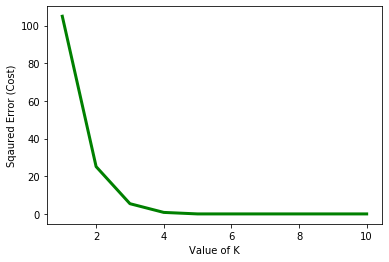

In [44]:
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(nyc_IndianRest_clustering) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 
  
# the point of the elbow is the  
# most optimal value for choosing k 

In [32]:
# set number of clusters
kclusters = 4
nyc_IndianRest_clustering = nyc_IndianRest.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nyc_IndianRest_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 3, 0, 0, 0])

In [33]:
# add clustering labels
nyc_IndianRest.insert(0, 'Cluster Labels', kmeans.labels_)

In [34]:
nyc_IndianRest

Cluster Labels               Neighborhood  Total
0                 0                   Allerton      0
1                 0                   Annadale      0
2                 0              Arden Heights      0
3                 0                  Arlington      0
4                 0                   Arrochar      0
5                 0                    Arverne      0
6                 3                    Astoria      3
7                 0            Astoria Heights      0
8                 0                 Auburndale      0
9                 0                 Bath Beach      0
10                0          Battery Park City      0
11                2                  Bay Ridge      1
12                0                Bay Terrace      0
13                0                 Baychester      0
14                3                    Bayside      3
15                0                  Bayswater      0
16                0               Bedford Park      0
17                0         Bedford Stuyvesant      0
18                0                 Beechhurst      0
19                0                   Bellaire      0
20                0               Belle Harbor      0
21                0                  Bellerose      0
22                0                    Belmont      0
23                0                Bensonhurst      0
24                0               Bergen Beach      0
25                0                 Blissville      0
26                0                 Bloomfield      0
27                2                Boerum Hill      1
28                0               Borough Park      0
29                0               Breezy Point      0
30                2                  Briarwood      1
31                0             Brighton Beach      0
32                0              Broad Channel      0
33                0          Broadway Junction      0
34                0                  Bronxdale      0
35                1           Brooklyn Heights      2
36                0                 Brookville      0
37                0                Brownsville      0
38                0                 Bulls Head      0
39                2                   Bushwick      1
40                0               Butler Manor      0
41                0            Cambria Heights      0
42                0                   Canarsie      0
43                1              Carnegie Hill      2
44                0            Carroll Gardens      0
45                0                Castle Hill      0
46                2          Castleton Corners      1
47                0             Central Harlem      0
48                0                 Charleston      0
49                2                    Chelsea      1
50                0                  Chinatown      0
51                0                City Island      0
52                0                  City Line      0
53                1               Civic Center      2
54                0          Claremont Village      0
55                0               Clason Point      0
56                0                    Clifton      0
57                0                    Clinton      0
58                3               Clinton Hill      3
59                0                 Co-op City      0
60                0                Cobble Hill      0
61                0              College Point      0
62                0                    Concord      0
63                0                  Concourse      0
64                2          Concourse Village      1
65                0               Coney Island      0
66                0                     Corona      0
67                0               Country Club      0
68                0              Crown Heights      0
69                0              Cypress Hills      0
70                0                Ditmas Park      0
71                0               Dongan Hills      0
72                0                 Douglaston      0
73       

In [35]:
nyc_merged = neighborhoods.join(nyc_IndianRest.set_index('Neighborhood'), on='Neighborhood')

nyc_merged.head() # check the last columns!

Borough Neighborhood   Latitude  Longitude  Cluster Labels  Total
0   Bronx    Wakefield  40.894705 -73.847201             0.0    0.0
1   Bronx   Co-op City  40.874294 -73.829939             0.0    0.0
2   Bronx  Eastchester  40.887556 -73.827806             0.0    0.0
3   Bronx    Fieldston  40.895437 -73.905643             0.0    0.0
4   Bronx    Riverdale  40.890834 -73.912585             0.0    0.0

In [36]:
nyc_merged

Borough               Neighborhood   Latitude  Longitude  \
0            Bronx                  Wakefield  40.894705 -73.847201   
1            Bronx                 Co-op City  40.874294 -73.829939   
2            Bronx                Eastchester  40.887556 -73.827806   
3            Bronx                  Fieldston  40.895437 -73.905643   
4            Bronx                  Riverdale  40.890834 -73.912585   
5            Bronx                Kingsbridge  40.881687 -73.902818   
6        Manhattan                Marble Hill  40.876551 -73.910660   
7            Bronx                   Woodlawn  40.898273 -73.867315   
8            Bronx                    Norwood  40.877224 -73.879391   
9            Bronx             Williamsbridge  40.881039 -73.857446   
10           Bronx                 Baychester  40.866858 -73.835798   
11           Bronx             Pelham Parkway  40.857413 -73.854756   
12           Bronx                City Island  40.847247 -73.786488   
13           Bronx               Bedford Park  40.870185 -73.885512   
14           Bronx         University Heights  40.855727 -73.910416   
15           Bronx             Morris Heights  40.847898 -73.919672   
16           Bronx                    Fordham  40.860997 -73.896427   
17           Bronx               East Tremont  40.842696 -73.887356   
18           Bronx                 West Farms  40.839475 -73.877745   
19           Bronx               High  Bridge  40.836623 -73.926102   
20           Bronx                    Melrose  40.819754 -73.909422   
21           Bronx                 Mott Haven  40.806239 -73.916100   
22           Bronx                Port Morris  40.801664 -73.913221   
23           Bronx                   Longwood  40.815099 -73.895788   
24           Bronx                Hunts Point  40.809730 -73.883315   
25           Bronx                 Morrisania  40.823592 -73.901506   
26           Bronx                  Soundview  40.821012 -73.865746   
27           Bronx               Clason Point  40.806551 -73.854144   
28           Bronx                Throgs Neck  40.815109 -73.816350   
29           Bronx               Country Club  40.844246 -73.824099   
30           Bronx                Parkchester  40.837938 -73.856003   
31           Bronx         Westchester Square  40.840619 -73.842194   
32           Bronx                   Van Nest  40.843608 -73.866299   
33           Bronx                Morris Park  40.847549 -73.850402   
34           Bronx                    Belmont  40.857277 -73.888452   
35           Bronx             Spuyten Duyvil  40.881395 -73.917190   
36           Bronx            North Riverdale  40.908543 -73.904531   
37           Bronx                 Pelham Bay  40.850641 -73.832074   
38           Bronx              Schuylerville  40.826580 -73.826203   
39           Bronx             Edgewater Park  40.821986 -73.813885   
40           Bronx                Castle Hill  40.819014 -73.848027   
41           Bronx                  Olinville  40.871371 -73.863324   
42           Bronx             Pelham Gardens  40.862966 -73.841612   
43           Bronx                  Concourse  40.834284 -73.915589   
44           Bronx                  Unionport  40.829774 -73.850535   
45           Bronx                   Edenwald  40.884561 -73.848083   
46        Brooklyn                  Bay Ridge  40.625801 -74.030621   
47        Brooklyn                Bensonhurst  40.611009 -73.995180   
48        Brooklyn                Sunset Park  40.645103 -74.010316   
49        Brooklyn                 Greenpoint  40.730201 -73.954241   
50        Brooklyn                  Gravesend  40.595260 -73.973471   
51        Brooklyn             Brighton Beach  40.576825 -73.965094   
52        Brooklyn             Sheepshead Bay  40.586890 -73.943186   
53        Brooklyn          Manhattan Terrace  40.614433 -73.957438   
54        Brooklyn                   Flatbush  40.636326 -73.958401   
55        Brooklyn              Cro

In [37]:
nyc_merged = nyc_merged.drop([257])
nyc_merged

Borough               Neighborhood   Latitude  Longitude  \
0            Bronx                  Wakefield  40.894705 -73.847201   
1            Bronx                 Co-op City  40.874294 -73.829939   
2            Bronx                Eastchester  40.887556 -73.827806   
3            Bronx                  Fieldston  40.895437 -73.905643   
4            Bronx                  Riverdale  40.890834 -73.912585   
5            Bronx                Kingsbridge  40.881687 -73.902818   
6        Manhattan                Marble Hill  40.876551 -73.910660   
7            Bronx                   Woodlawn  40.898273 -73.867315   
8            Bronx                    Norwood  40.877224 -73.879391   
9            Bronx             Williamsbridge  40.881039 -73.857446   
10           Bronx                 Baychester  40.866858 -73.835798   
11           Bronx             Pelham Parkway  40.857413 -73.854756   
12           Bronx                City Island  40.847247 -73.786488   
13           Bronx               Bedford Park  40.870185 -73.885512   
14           Bronx         University Heights  40.855727 -73.910416   
15           Bronx             Morris Heights  40.847898 -73.919672   
16           Bronx                    Fordham  40.860997 -73.896427   
17           Bronx               East Tremont  40.842696 -73.887356   
18           Bronx                 West Farms  40.839475 -73.877745   
19           Bronx               High  Bridge  40.836623 -73.926102   
20           Bronx                    Melrose  40.819754 -73.909422   
21           Bronx                 Mott Haven  40.806239 -73.916100   
22           Bronx                Port Morris  40.801664 -73.913221   
23           Bronx                   Longwood  40.815099 -73.895788   
24           Bronx                Hunts Point  40.809730 -73.883315   
25           Bronx                 Morrisania  40.823592 -73.901506   
26           Bronx                  Soundview  40.821012 -73.865746   
27           Bronx               Clason Point  40.806551 -73.854144   
28           Bronx                Throgs Neck  40.815109 -73.816350   
29           Bronx               Country Club  40.844246 -73.824099   
30           Bronx                Parkchester  40.837938 -73.856003   
31           Bronx         Westchester Square  40.840619 -73.842194   
32           Bronx                   Van Nest  40.843608 -73.866299   
33           Bronx                Morris Park  40.847549 -73.850402   
34           Bronx                    Belmont  40.857277 -73.888452   
35           Bronx             Spuyten Duyvil  40.881395 -73.917190   
36           Bronx            North Riverdale  40.908543 -73.904531   
37           Bronx                 Pelham Bay  40.850641 -73.832074   
38           Bronx              Schuylerville  40.826580 -73.826203   
39           Bronx             Edgewater Park  40.821986 -73.813885   
40           Bronx                Castle Hill  40.819014 -73.848027   
41           Bronx                  Olinville  40.871371 -73.863324   
42           Bronx             Pelham Gardens  40.862966 -73.841612   
43           Bronx                  Concourse  40.834284 -73.915589   
44           Bronx                  Unionport  40.829774 -73.850535   
45           Bronx                   Edenwald  40.884561 -73.848083   
46        Brooklyn                  Bay Ridge  40.625801 -74.030621   
47        Brooklyn                Bensonhurst  40.611009 -73.995180   
48        Brooklyn                Sunset Park  40.645103 -74.010316   
49        Brooklyn                 Greenpoint  40.730201 -73.954241   
50        Brooklyn                  Gravesend  40.595260 -73.973471   
51        Brooklyn             Brighton Beach  40.576825 -73.965094   
52        Brooklyn             Sheepshead Bay  40.586890 -73.943186   
53        Brooklyn          Manhattan Terrace  40.614433 -73.957438   
54        Brooklyn                   Flatbush  40.636326 -73.958401   
55        Brooklyn              Cro

In [38]:
nyc_merged = nyc_merged.drop([207])
nyc_merged

Borough               Neighborhood   Latitude  Longitude  \
0            Bronx                  Wakefield  40.894705 -73.847201   
1            Bronx                 Co-op City  40.874294 -73.829939   
2            Bronx                Eastchester  40.887556 -73.827806   
3            Bronx                  Fieldston  40.895437 -73.905643   
4            Bronx                  Riverdale  40.890834 -73.912585   
5            Bronx                Kingsbridge  40.881687 -73.902818   
6        Manhattan                Marble Hill  40.876551 -73.910660   
7            Bronx                   Woodlawn  40.898273 -73.867315   
8            Bronx                    Norwood  40.877224 -73.879391   
9            Bronx             Williamsbridge  40.881039 -73.857446   
10           Bronx                 Baychester  40.866858 -73.835798   
11           Bronx             Pelham Parkway  40.857413 -73.854756   
12           Bronx                City Island  40.847247 -73.786488   
13           Bronx               Bedford Park  40.870185 -73.885512   
14           Bronx         University Heights  40.855727 -73.910416   
15           Bronx             Morris Heights  40.847898 -73.919672   
16           Bronx                    Fordham  40.860997 -73.896427   
17           Bronx               East Tremont  40.842696 -73.887356   
18           Bronx                 West Farms  40.839475 -73.877745   
19           Bronx               High  Bridge  40.836623 -73.926102   
20           Bronx                    Melrose  40.819754 -73.909422   
21           Bronx                 Mott Haven  40.806239 -73.916100   
22           Bronx                Port Morris  40.801664 -73.913221   
23           Bronx                   Longwood  40.815099 -73.895788   
24           Bronx                Hunts Point  40.809730 -73.883315   
25           Bronx                 Morrisania  40.823592 -73.901506   
26           Bronx                  Soundview  40.821012 -73.865746   
27           Bronx               Clason Point  40.806551 -73.854144   
28           Bronx                Throgs Neck  40.815109 -73.816350   
29           Bronx               Country Club  40.844246 -73.824099   
30           Bronx                Parkchester  40.837938 -73.856003   
31           Bronx         Westchester Square  40.840619 -73.842194   
32           Bronx                   Van Nest  40.843608 -73.866299   
33           Bronx                Morris Park  40.847549 -73.850402   
34           Bronx                    Belmont  40.857277 -73.888452   
35           Bronx             Spuyten Duyvil  40.881395 -73.917190   
36           Bronx            North Riverdale  40.908543 -73.904531   
37           Bronx                 Pelham Bay  40.850641 -73.832074   
38           Bronx              Schuylerville  40.826580 -73.826203   
39           Bronx             Edgewater Park  40.821986 -73.813885   
40           Bronx                Castle Hill  40.819014 -73.848027   
41           Bronx                  Olinville  40.871371 -73.863324   
42           Bronx             Pelham Gardens  40.862966 -73.841612   
43           Bronx                  Concourse  40.834284 -73.915589   
44           Bronx                  Unionport  40.829774 -73.850535   
45           Bronx                   Edenwald  40.884561 -73.848083   
46        Brooklyn                  Bay Ridge  40.625801 -74.030621   
47        Brooklyn                Bensonhurst  40.611009 -73.995180   
48        Brooklyn                Sunset Park  40.645103 -74.010316   
49        Brooklyn                 Greenpoint  40.730201 -73.954241   
50        Brooklyn                  Gravesend  40.595260 -73.973471   
51        Brooklyn             Brighton Beach  40.576825 -73.965094   
52        Brooklyn             Sheepshead Bay  40.586890 -73.943186   
53        Brooklyn          Manhattan Terrace  40.614433 -73.957438   
54        Brooklyn                   Flatbush  40.636326 -73.958401   
55        Brooklyn              Cro

In [39]:
nyc_merged['Cluster Labels'] = nyc_merged['Cluster Labels'].astype(int)

In [45]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged['Latitude'],nyc_merged['Longitude'], nyc_merged['Neighborhood'], nyc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters